# Задача 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data_test.csv', encoding='cp1251')
df.head()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before


In [3]:
print(np.unique(df["unit_1"]))
print(np.unique(df["unit_2"]))
print(np.unique(df["unit_3"]))
print(np.unique(df["unit_4"]))

['булава' 'лук' 'меч' 'посох' 'топор']
['булава' 'лук' 'меч' 'посох' 'топор']
['булава' 'лук' 'меч' 'посох' 'топор']
['булава' 'лук' 'меч' 'посох' 'топор']


Всего 5 возможных типов оружия

In [4]:
df["balance_mark"].replace({'before': 0, 'after': 1}, inplace = True)
df.head()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,0
1,117214,посох,посох,лук,лук,21.84,0
2,115502,меч,посох,булава,топор,16.00,0
3,110102,булава,лук,лук,булава,17.22,0
4,104989,меч,посох,булава,посох,19.20,0


In [5]:
df["unit_1"].replace({'булава': 'b', 'лук': 'l', 'меч': 'm', 'посох': 'p', 'топор': 't'}, inplace=True)
df["unit_2"].replace({'булава': 'b', 'лук': 'l', 'меч': 'm', 'посох': 'p', 'топор': 't'}, inplace=True)
df["unit_3"].replace({'булава': 'b', 'лук': 'l', 'меч': 'm', 'посох': 'p', 'топор': 't'}, inplace=True)
df["unit_4"].replace({'булава': 'b', 'лук': 'l', 'меч': 'm', 'посох': 'p', 'топор': 't'}, inplace=True)

In [6]:
df.head()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,t,l,b,l,17.35,0
1,117214,p,p,l,l,21.84,0
2,115502,m,p,b,t,16.00,0
3,110102,b,l,l,b,17.22,0
4,104989,m,p,b,p,19.20,0


In [7]:
stats_before = {}
stats_after = {}

for index, row in df.iterrows():
    army = row['unit_1'] + row['unit_2'] + row['unit_3'] + row['unit_4']
    army = ''.join(sorted(army))
    if row['balance_mark'] == 0:
        if army in stats_before:
            stats_before[army].append(float(row['len']))
        else:
            stats_before[army] = []
            stats_before[army].append(float(row['len']))
    else:
        if army in stats_after:
            stats_after[army].append(float(row['len']))
        else:
            stats_after[army] = []
            stats_after[army].append(float(row['len']))

In [8]:
data_before = []
data_after = []

for key, value in stats_before.items():
    data_before += value
    
for key, value in stats_after.items():
    data_after += value

Для начала построим диаграммы размаха для результатов до и после обновления вне зависимости от типа текущего набора солдат. 

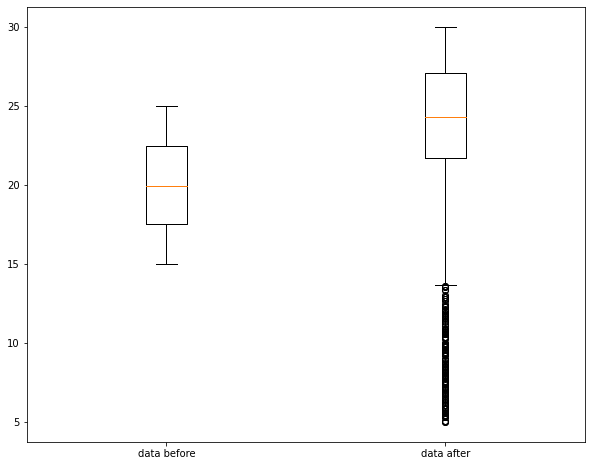

In [9]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
bp = plt.boxplot([data_before, data_after])
ax.set_xticklabels(['data before', 'data after'])
plt.show()

Видно, что в среднем время боя увеличилось после обновления, однако при этом сильно опустилась нижняя наблюдаемая граница и появилось слишком много выбросов (?) с маленьким временем боя. Проанализируем по отдельности для всех разновидностей боя

In [10]:
print(len(stats_before))
print(len(stats_after))

70
70


In [11]:
median_diff = 0
median_diffs = []

for key, value in stats_before.items():
    median_diff += np.median(stats_after[key]) - np.median(value)
    median_diffs.append(round(np.median(stats_after[key]) - np.median(value), 2))
    
print('Среднее значение разноти после и до:', round(median_diff / 70, 2))
print('Медианное значение среди разноти времени после и до:', np.median(median_diffs))
print('Среднеквадратическое отклонение:', round(np.std(median_diffs), 2))
print('Разница времени боя после изменений и до для каждой комбинации:')
for el in sorted(list(zip(stats_before.keys(), median_diffs)), key=lambda x: x[1]):
    print(el)

Среднее значение разноти после и до: 3.74
Медианное значение среди разноти времени после и до: 4.77
Среднеквадратическое отклонение: 2.64
Разница времени боя после изменений и до для каждой комбинации:
('bbmt', -10.85)
('mmtt', -0.75)
('bbbt', -0.7)
('bmtt', -0.29)
('bbtt', -0.28)
('bbmm', -0.07)
('mmmt', 0.17)
('bttt', 0.18)
('bbbm', 0.18)
('bmmt', 0.25)
('bbbb', 0.29)
('mttt', 0.8)
('bmmm', 0.82)
('tttt', 1.58)
('llll', 2.03)
('mmmm', 2.15)
('lllp', 2.8)
('llmm', 3.78)
('mmpt', 3.82)
('bblm', 3.86)
('pppp', 3.92)
('lmmt', 4.13)
('lmmp', 4.18)
('bbbl', 4.18)
('bppt', 4.21)
('bbpt', 4.33)
('blpp', 4.39)
('mmmp', 4.43)
('blll', 4.52)
('bllt', 4.61)
('lmmm', 4.62)
('pptt', 4.66)
('bbll', 4.72)
('pttt', 4.72)
('blmm', 4.75)
('lttt', 4.79)
('lmpt', 4.81)
('pppt', 4.82)
('bmmp', 4.83)
('blpt', 4.84)
('lllm', 4.89)
('blmt', 4.91)
('bmpt', 4.93)
('llpt', 4.95)
('bllm', 4.95)
('lmpp', 4.98)
('bmpp', 5.01)
('llpp', 5.09)
('bblp', 5.11)
('lltt', 5.14)
('bptt', 5.26)
('bppp', 5.26)
('lllt', 5.32)

Медианное значение времени боя в основном увеличилось. Среднее значение разности больше чем std, изменения значимые. Также стоит отдельно обратить внимание на баланс комбинации "булава-булава-молот-топор", т.к. в таком сочетании наблюдается сильное уменьшение времени боя.

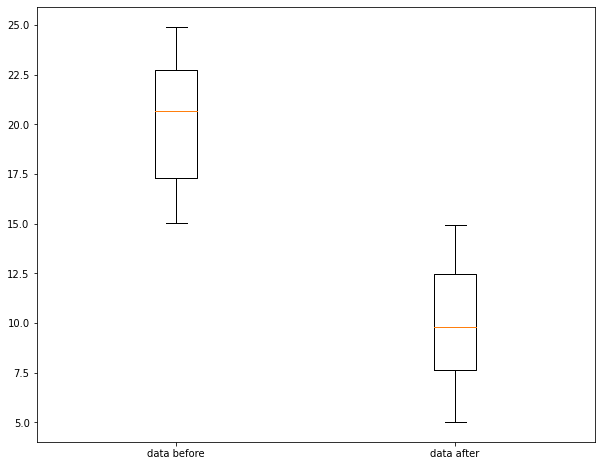

In [12]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
bp = plt.boxplot([stats_before['bbmt'], stats_after['bbmt']])
ax.set_xticklabels(['data before', 'data after'])
plt.show()

# Задача 3

Сделаем перебор, хе-хе

In [13]:
full_set = 0
all_variants = 0

for a in range(3):
    for b in range(3):
        for c in range(3):
            for d in range(3):
                for e in range(3):
                    for f in range(3):
                        taken = [a, b, c, d, e, f]
                        if 0 in taken and 1 in taken and 2 in taken:
                            full_set += 1
                        all_variants += 1
                        
print('Число исходов полностью собранного сета:', full_set)
print('Число возможных исзодов:', all_variants)

print('Вероятность:', full_set / all_variants)

Число исходов полностью собранного сета: 540
Число возможных исзодов: 729
Вероятность: 0.7407407407407407
